<a href="https://colab.research.google.com/github/uniquelyshreya/continuous-deployment-on-kubernetes/blob/main/assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving house_data.xlsx to house_data.xlsx


In [4]:
data = pd.read_excel('house_data.xlsx')

In [5]:
data.head()

,House_Size,House_Price
0,374.540119,116714.389066
1,950.714306,270263.924400
2,731.993942,224186.221370
3,598.658484,80219.099529
4,156.018640,35821.997741


In [6]:
data.isnull().sum()

,0
House_Size,0
House_Price,0


In [7]:
data.describe()

,House_Size,House_Price
count,100.000000,100.000000
mean,470.180743,141000.205005
std,297.489411,93956.895853
min,5.522117,-38096.894236
25%,193.200761,65139.721461
50%,464.142455,133802.788924
75%,730.203119,214881.918906
max,986.886937,352219.753320


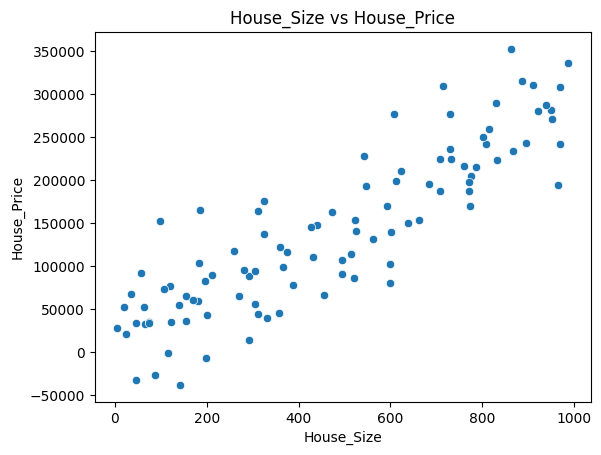

In [9]:
sns.scatterplot(x="House_Size",y="House_Price",data = data)
plt.title("House_Size vs House_Price")
plt.show()



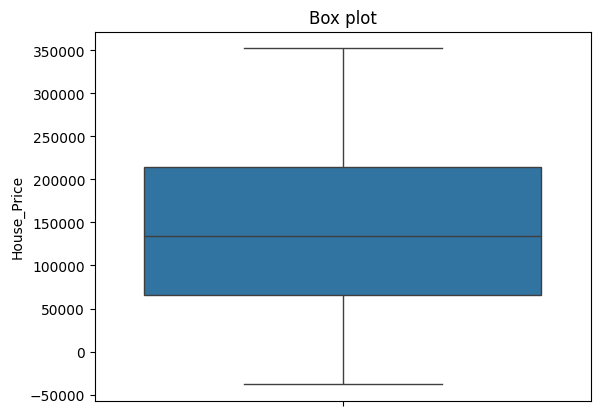

In [12]:
sns.boxplot(y = data["House_Price"])
plt.title("Box plot")
plt.show()


In [13]:
Q1 = data["House_Price"].quantile(0.25)
Q3 = data["House_Price"].quantile(0.75)
IQR = Q3 - Q1
data = data[
    (data["House_Price"]>= Q1 - 1.5*IQR)&
    (data["House_Price"]<= Q3 + 1.5*IQR)
]

In [14]:
data["House_Size Normalise"] = (
    (data["House_Size"]-data["House_Size"].min())/
    (data["House_Size"].max()- data["House_Size"].min())
)

In [15]:
data

,House_Size,House_Price,House_Size Normalise
0,374.540119,116714.389066,0.376025
1,950.714306,270263.924400,0.963140
2,731.993942,224186.221370,0.740267
3,598.658484,80219.099529,0.604399
4,156.018640,35821.997741,0.153354
...,...,...,...
95,493.795596,107348.164661,0.497545
96,522.732829,152964.763344,0.527032
97,427.541018,145319.904248,0.430033
98,25.419127,21460.277990,0.020275


In [25]:
x = data[["House_Price"]]
y = data["House_Size"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                              test_size = 0.2,
                                         random_state = 42 )

In [27]:
print(x_train.shape)
print(y_train.shape)


(80, 1)
(80,)


In [19]:
x_train.head()

,House_Price
55,279990.419247
88,314332.629235
26,42766.408821
42,67457.697060
69,335157.224569


In [26]:
from sklearn.linear_model import LinearRegression #import model
model = LinearRegression() #create model object
model.fit(x_train,y_train)  #train (fit) the model
print("Slope:", model.coef_)  #slope
print("Intercept",model.intercept_)  #intercept
y_pred = model.predict(x_test)     #make predictions


# the error was due to [[]] i did not use double brackets previously during x_train = data[["House_Price"]]
# double brackets create a 2d structure and here model.fit() expects x_train to be 2d container



Slope: [0.00270865]
Intercept 93.81330575032177


In [28]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


MSE: 19411.954098898896


In [29]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: 0.8033636339644251
